# Нейронные сети с Keras
Keras -- простая библиотека для написания нейронных сетей. Keras не позволяет строить сложные модели со специфическими функциями потерь, но зато удобен в использовании. Синтаксис Keras напоминает синтаксис sklearn.

In [0]:
import numpy as np
import keras, keras.layers as L
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Введение
Основной класс для работы с керасом -- модель Sequential. В модель можно последовательно добавлять слои нейронной сети. 

После добавления всех слоёв можно вызвать model.compile, указав в аргументах функцию потерь, оптимизатор и метрику, которую необходимо считать при оптиимзации.

Функция .summary выводит информацию о нейронной сети.

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer(input_shape=[64]))
model.add(L.Dense(100, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0805 17:23:07.553639 139933900724096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 17:23:07.616038 139933900724096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 17:23:07.625886 139933900724096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 17:23:07.656319 139933900724096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 17:23:07.678239 139933900724096 deprecation_wrappe

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 7,510
Trainable params: 7,510
Non-trainable params: 0
_________________________________________________________________


Обучим модель на датасете digits. 

0

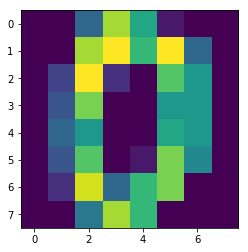

In [0]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

X, y = load_digits(return_X_y=True)

plt.imshow(X[0].reshape((8,8)))

y[0]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

W0805 17:26:57.881255 139933900724096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1437 samples, validate on 360 samples
Epoch 1/100
1437/1437 [==============================] - 4s 3ms/step - loss: 3.7453 - acc: 0.3319 - val_loss: 1.0018 - val_acc: 0.6917
Epoch 2/100
1437/1437 [==============================] - 0s 109us/step - loss: 0.5533 - acc: 0.8253 - val_loss: 0.4337 - val_acc: 0.8722
Epoch 3/100
1437/1437 [==============================] - 0s 107us/step - loss: 0.2934 - acc: 0.9130 - val_loss: 0.3117 - val_acc: 0.9056
Epoch 4/100
1437/1437 [==============================] - 0s 110us/step - loss: 0.1971 - acc: 0.9360 - val_loss: 0.2590 - val_acc: 0.9194
Epoch 5/100
1437/1437 [==============================] - 0s 111us/step - loss: 0.1487 - acc: 0.9596 - val_loss: 0.2054 - val_acc: 0.9306
Epoch 6/100
1437/1437 [==============================] - 0s 115us/step - loss: 0.1109 - acc: 0.9687 - val_loss: 0.1859 - val_acc: 0.9306
Epoch 7/100
1437/1437 [==============================] - 0s 121us/step - loss: 0.0883 - acc: 0.9777 - val_loss: 0.1526 - val_acc: 0.9

### Обобщающая способность нейронной сети
Визуализируем предсказания нейронной сети на простой задаче восстановления одномерной зависимости. 

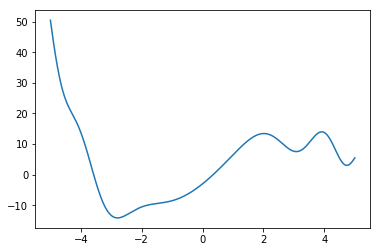

In [0]:
X = np.linspace(-5, 5, 1000)
y = 0.05 * X ** 4 - 0.5 * X ** 3 + 8 * X - 3 + 4 * np.sin(X**2 / 2)
plt.plot(X,y)

Подберём нейронную сеть, хорошо приближающую нашу функцию.

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([1]))
model.add(L.Dense(50, activation='relu'))
model.add(L.Dense(50, activation='sigmoid'))
model.add(L.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
model.fit(X,y, epochs=300, validation_split=0.2, shuffle=True)

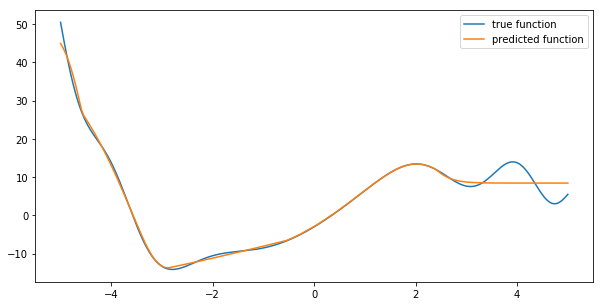

In [0]:
plt.figure(figsize=(10,5))
plt.plot(X,y, label='true function')
plt.plot(X, model.predict(X), label='predicted function')
plt.legend()
plt.show()

### Как выстрелить себе в ногу с Keras

* __Задача:__ Предсказать цену дома в $mil
* __Вход:__ 39 признаков этого дома

In [0]:
model = keras.models.Sequential()

model.add(L.InputLayer([39]))
model.add(L.Dense(128, activation='relu', kernel_initializer=keras.initializers.zeros())) 
model.add(L.Dense(128, activation='relu', kernel_initializer=keras.initializers.zeros())) 
model.add(L.Dense(1))

model.compile(optimizer='sgd', loss='mean_squared_error') 

* __Задача:__ Распознать рукописную цифру (0-9)
* __Вход:__ картинка 28 x 28 пикселей (ч/б)

In [0]:
model = keras.models.Sequential()

model.add(L.InputLayer([28, 28, 1]))

model.add(L.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(L.Activation('relu'))
model.add(L.MaxPool2D(pool_size=(2, 2)))
model.add(L.Flatten())

model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1))

model.add(L.Dense(10))
model.add(L.Activation('softmax'))

model.compile(optimizer='rmsprop', loss='mean_squared_error')

* __Задача:__ классификация одежды (10 классов)
* __Вход:__ картинка RGB 100 x 100 пикселей

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([100, 100, 3]))

for filters in [32, 64, 128]:
    model.add(L.Conv2D(filters, kernel_size=(5, 5)))
    model.add(L.MaxPooling2D(pool_size=(3, 3)))
    model.add(L.Activation('relu'))
    model.add(L.BatchNormalization())

model.add(L.Flatten())

model.add(L.Dense(100, activation='relu'))
model.add(L.Dropout(0.5))
model.add(L.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [0]:
model.summary()

### Обучение нейронной сети на примере датасета cifar10

In [0]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
(40000, 32, 32, 3) (40000, 1)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

Нормировка:

In [0]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [0]:
model = keras.models.Sequential()

model.add(L.InputLayer(input_shape=[32,32,3]))
model.add(L.Flatten())
model.add(L.Dense(300, activation='relu'))
model.add(L.Dense(100, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=20, validation_data=[X_val, y_val])

In [0]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.4781
 Not bad!


### Улучшаем модель (Домашнее задание)
Составьте и обучите модель, состоящую из следующих слоёв:

- Входной слой
- Свёртка 3x3 с 10 фильтрами
- Нелинейность на ваш вкус
- Max-pooling 2x2
- Вытягиваем оставшееся в вектор (Flatten)
- Полносвязный слой на 100 нейронов
- Нелинейность на ваш вкус
- Выходной полносвязный слой с softmax

In [21]:
keras.backend.clear_session()
model = keras.models.Sequential()

# Ваш код: создайте модель описанную выше, она должна получить качество > 0.5 точности на тесте
# Если этого сделать не удается немного увеличьте число эпох (параметр epochs)
# ДОП. ЗАДАНИЕ: Постарайтесь улучшить модель за счет изменения архитектуры сети.
# 3-е лучших слушателей по метрике accuracy получат зачет автоматом

model.add(L.InputLayer(input_shape=[32,32,3]))
for filters in [32, 64, 128, 256]:
  model.add(L.Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(1e-4)))
  #model.add(L.MaxPooling2D(pool_size=(2, 2)))
  model.add(L.BatchNormalization())
  model.add(L.Activation('relu'))
  
model.add(L.BatchNormalization())
model.add(L.Activation('relu'))

model.add(L.AveragePooling2D(pool_size=8))
model.add(L.Flatten())
model.add(L.Dense(4096, activation='relu'))
#model.add(L.Dropout(0.1))
model.add(L.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

checkpoint = keras.callbacks.ModelCheckpoint(filepath='./cifar10_hw3.h5',
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_reducer = keras.callbacks.ReduceLROnPlateau(factor=np.sqrt(0.1),
                                               cooldown=0,
                                               patience=5,
                                               min_lr=0.5e-6)
callbacks = [checkpoint, lr_reducer]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
__________

In [0]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=[X_val, y_val], shuffle=True, verbose=1, callbacks=callbacks)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 4864/40000 [==>...........................] - ETA: 1:32 - loss: 4.9620 - acc: 0.1912

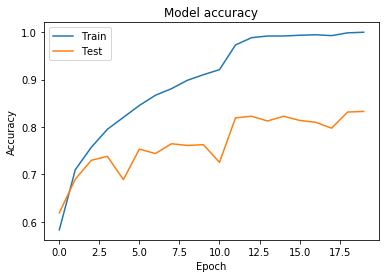

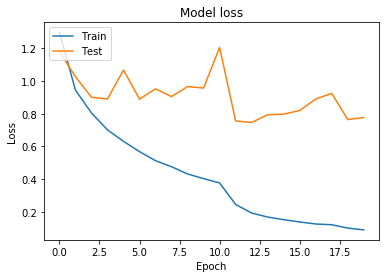

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.8293
 Not bad!
